# Exercise 4.2 - Solution
## Linear regression
In this task we will design and train a linear model using [Keras](https://keras.io/).

### Tasks
1. Complete the implemetation of the `LinearLayer`
2. Define a meaningful objective
3. Implement gradient descent and train the linear model for 80 epochs.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

layers = keras.layers

### Simulation of data
Let's first simulate some noisy data

In [2]:
np.random.seed(1904)
x = np.float32(np.linspace(-1, 1, 100)[:,np.newaxis])
y = np.float32(2 * x[:,0] + 0.3 * np.random.randn(100))
print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: (100, 1)
y.shape: (100,)


### Implement linear model

Now, we have to design a <b>linear layer</b> that maps from the input $x$ to the output $y$ using a single adaptive weight $w$:
 
$$y = w \cdot x$$

### Task 1
Complete the implementation of the `LinearLayer` by adding the linear transformation in the `call` function.

In [3]:
class LinearLayer(layers.Layer):

    def __init__(self, units=1, input_dim=1):  # when intializing the layer the weights have to be initialized
        super(LinearLayer, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype="float32"),
                             trainable=True)

    def call(self, inputs):  # when calling the layer the linear transformation has to be performed
        return tf.matmul(inputs, self.w)

Build a model using the implemented layer.

In [4]:
model = keras.models.Sequential()
model.add(LinearLayer(units=1, input_dim=1))

In [5]:
model.build((None, 1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_layer (LinearLayer)   (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________
None


### Performance before the training
Plot data and model before the training

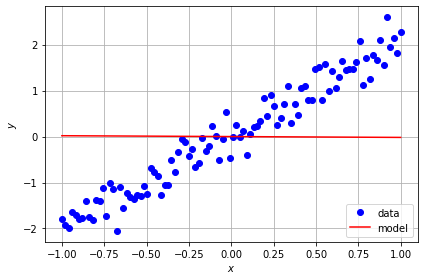

In [6]:
y_pred = model(x)

fig, ax = plt.subplots(1)
ax.plot(x, y, 'bo', label='data')
ax.plot(x, y_pred, 'r-', label='model')
ax.set(xlabel='$x$', ylabel='$y$')
ax.grid()
ax.legend(loc='lower right')
plt.tight_layout()

### Task 2: Define the objective function
Define a meaningful objective here (regression task).  
Note that you can use `tf.reduce_mean()` to average your loss estimate over the full data set (100 points).

In [7]:
def loss(x, y):
    return tf.reduce_mean((tf.squeeze(x)-tf.squeeze(y))**2)

### Task 3 - Train the model using gradient descent
'Train' the linear model for 80 epochs (or iterations) with a meaningful learning rate and implement gradient descent.  
Hint: you can access the adaptive parameters using `model.trainable_weights` and perform $w' \rightarrow w-z$ using `w.assign_sub(z)`

In [8]:
epochs = 80  # number of epochs
lr = 0.1  # learning rate

for epoch in range(epochs):

    with tf.GradientTape() as tape:
        output = model(x, training=True)
        # Compute loss value
        loss_value = loss(tf.convert_to_tensor(y), output)
        grads = tape.gradient(loss_value, model.trainable_weights)
        
        for weight, grad in zip(model.trainable_weights, grads):
            weight.assign_sub(lr * grad)

        print("Current loss at epoch %d: %.4f" % (epoch, float(loss_value)))

Current loss at epoch 0: 1.5236
Current loss at epoch 1: 1.3338
Current loss at epoch 2: 1.1689
Current loss at epoch 3: 1.0257
Current loss at epoch 4: 0.9014
Current loss at epoch 5: 0.7933
Current loss at epoch 6: 0.6995
Current loss at epoch 7: 0.6180
Current loss at epoch 8: 0.5472
Current loss at epoch 9: 0.4857
Current loss at epoch 10: 0.4323
Current loss at epoch 11: 0.3859
Current loss at epoch 12: 0.3456
Current loss at epoch 13: 0.3106
Current loss at epoch 14: 0.2802
Current loss at epoch 15: 0.2538
Current loss at epoch 16: 0.2308
Current loss at epoch 17: 0.2109
Current loss at epoch 18: 0.1936
Current loss at epoch 19: 0.1786
Current loss at epoch 20: 0.1655
Current loss at epoch 21: 0.1542
Current loss at epoch 22: 0.1443
Current loss at epoch 23: 0.1357
Current loss at epoch 24: 0.1283
Current loss at epoch 25: 0.1219
Current loss at epoch 26: 0.1163
Current loss at epoch 27: 0.1114
Current loss at epoch 28: 0.1072
Current loss at epoch 29: 0.1035
Current loss at epoc

### Performance of the fitted model
Plot data and model after the training

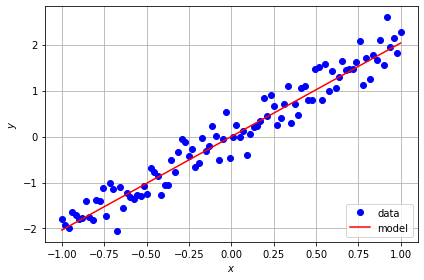

In [9]:
fig, ax = plt.subplots(1)

y_pred = model(x)

ax.plot(x, y, 'bo', label='data')
ax.plot(x, y_pred, 'r-', label='model')
ax.set(xlabel='$x$', ylabel='$y$')
ax.grid()
ax.legend(loc='lower right')
plt.tight_layout()